In [1]:
import numpy as np
import scipy
import scipy.ndimage.filters

In [2]:
?scipy.ndimage.filters.gaussian_filter

Signature:
scipy.ndimage.filters.gaussian_filter(
    input,
    sigma,
    order=0,
    output=None,
    mode='reflect',
    cval=0.0,
    truncate=4.0,
)
Docstring:
Multidimensional Gaussian filter.

Parameters
----------
input : array_like
    The input array.
sigma : scalar or sequence of scalars
    Standard deviation for Gaussian kernel. The standard
    deviations of the Gaussian filter are given for each axis as a
    sequence, or as a single number, in which case it is equal for
    all axes.
order : int or sequence of ints, optional
    The order of the filter along each axis is given as a sequence
    of integers, or as a single number. An order of 0 corresponds
    to convolution with a Gaussian kernel. A positive order
    corresponds to convolution with that derivative of a Gaussian.
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
mode 

In [3]:
matrix = np.zeros((91, 91))

In [4]:
matrix[45, 45] = 1

In [5]:
matrix_blur = scipy.ndimage.filters.gaussian_filter(matrix, 15)

In [6]:
# https://stackoverflow.com/questions/27350226/how-to-make-the-text-size-of-the-x-and-y-axis-labels-and-the-title-on-matplotlib

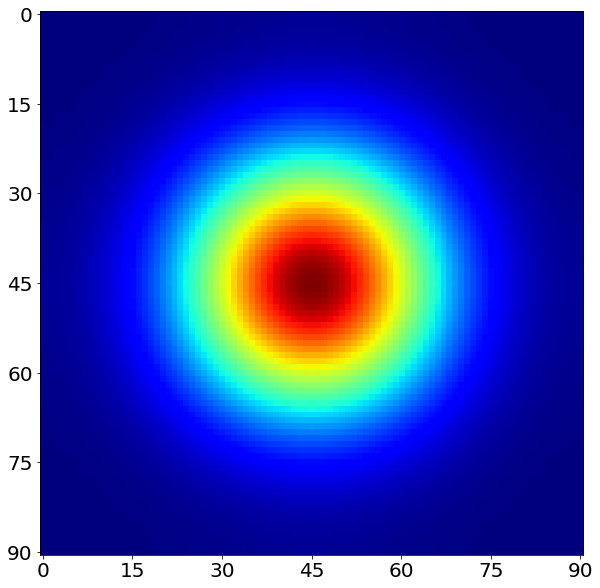

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
plt.xticks([0, 15, 30, 45, 60, 75, 90], size=20)
plt.yticks([0, 15,30,45,60, 75, 90], size=20)
plt.imshow(matrix_blur, cmap='jet', interpolation='nearest')
plt.savefig("gaussian_blur.png", dpi=300)
plt.show()

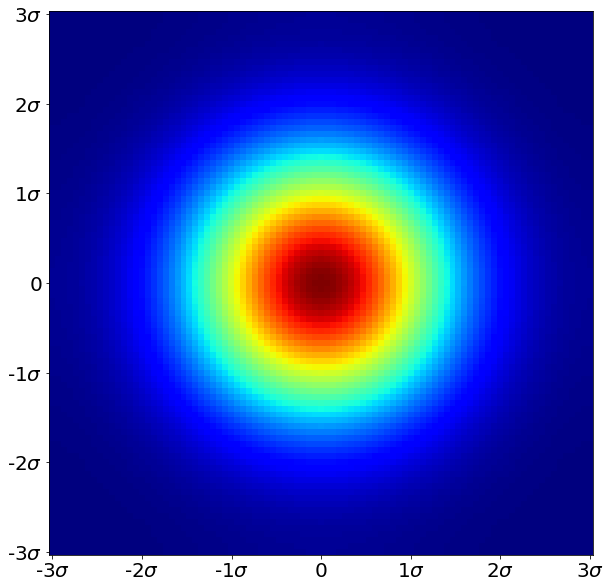

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
labels = [r"-$3\sigma$", r"-$2\sigma$", r"-$1\sigma$", r"0", r"$1\sigma$", r"$2\sigma$", r"$3\sigma$"]
plt.xticks([0, 15, 30, 45, 60, 75, 90], labels, size=20)
plt.yticks([0, 15, 30, 45, 60, 75, 90], reversed(labels), size=20)
plt.imshow(matrix_blur, cmap='jet', interpolation='nearest')
plt.savefig("gaussian_blur_sigma.png", dpi=300)
plt.show()

# Multiple blur 

In [32]:
# generate xticks and label 
# plt.xticks([0, 15, 30, 45, 60, 75, 90], labels, size=20)
xtick_marks = list(range(0, 181, 15))
xtick_label = list(range(0, 13, 1))

In [33]:
list(range(0, 181, 15))

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]

In [49]:
m1 = np.zeros((181, 181))
m1[60, 60] = 1
# get the indices where data is 1
m1_blur = scipy.ndimage.filters.gaussian_filter(m1, 15)

In [50]:
m2 = np.zeros((181, 181))
m2[90, 90] = 1
m2_blur = scipy.ndimage.filters.gaussian_filter(m2, 15)

In [51]:
m3 = np.zeros((181, 181))
m3[150, 150] = 1
m3_blur = scipy.ndimage.filters.gaussian_filter(m3, 15)

In [52]:
m4 = np.zeros((181, 181))
m4[60, 90] = 1
m4_blur = scipy.ndimage.filters.gaussian_filter(m4, 15)

In [60]:
def plot_gaussian_blur_with_center_x(m, m_blur):
    mxy = np.argwhere(m == 1).T
    plt.figure(figsize=(10, 10))
    plt.scatter(mxy[0], mxy[1], marker='x', color="black")
    plt.xticks(xtick_marks, xtick_label, size=20)
    plt.yticks(xtick_marks, reversed(xtick_label), size=20)
    # plt.xticks([0, 15, 30, 45, 60, 75, 90], size=20)
    plt.imshow(m_blur.T, cmap='jet', interpolation='nearest')
    plt.show()

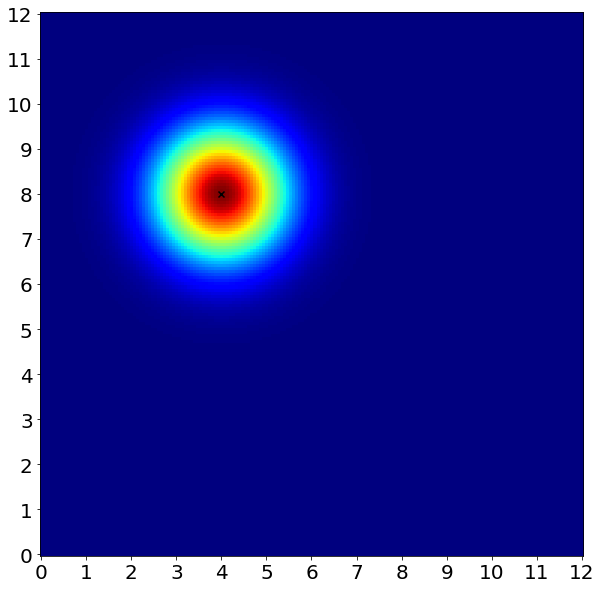

In [61]:
plot_gaussian_blur_with_center_x(m1, m1_blur)

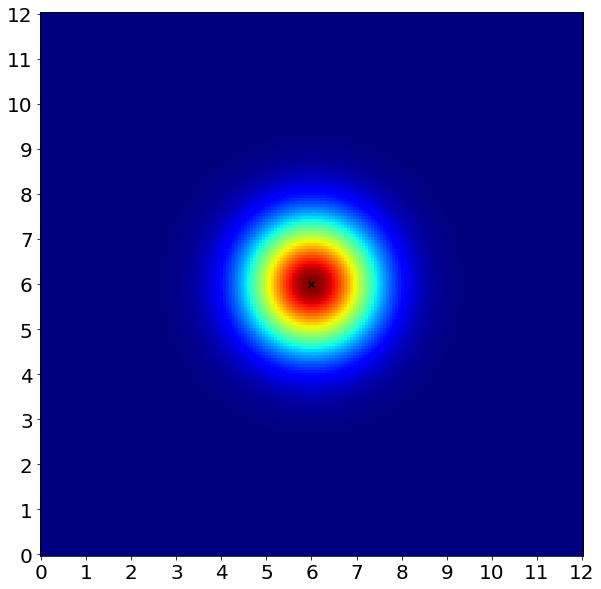

In [62]:
plot_gaussian_blur_with_center_x(m2, m2_blur)

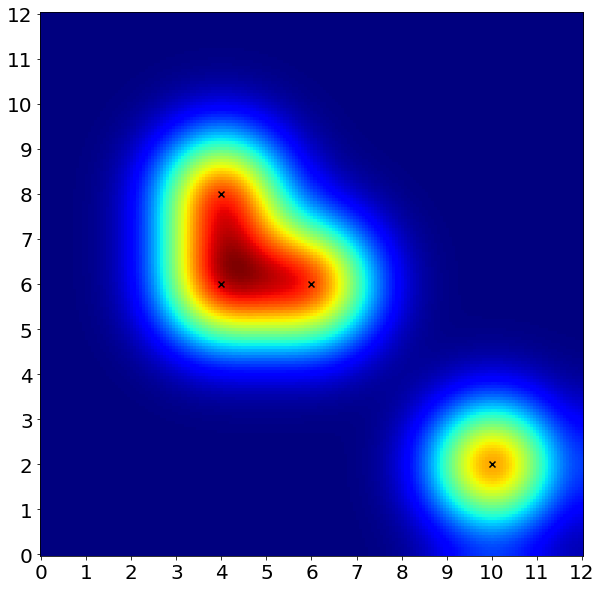

In [63]:
plot_gaussian_blur_with_center_x(m1 + m2 + m3 + m4, m1_blur + m2_blur + m3_blur + m4_blur)